In [1]:
import time
import random
from weighted_graph import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
def generate_complete_graph(n):
    g = WeightedGraph(n)
    for i in range(n):
        for j in range(i+1, n):
            g.add_edge(i, j, random.uniform(0, 1))
    return g

def generate_connected_graph(n, qtd_edges_to_add=0):
    g = generate_random_tree(n)
    for i in range(qtd_edges_to_add):
        a,b = random.randint(0,n-1), random.randint(0, n-1)
        if not g.are_neighbours(a, b):
            g.add_edge(a, b, random.uniform(0, 1))
    return g

In [4]:
data = defaultdict(lambda: [])

In [5]:
for n in [10, 100, 1000]:
    g = generate_complete_graph(n)
    for i in range(3):
        print(f"Running n={n} i={i}")
        print("Kruskal")
        start = time.time()
        g.kruskal()
        kruskal_time = time.time() - start
        data["time"].append(kruskal_time)
        data["size"].append(n)
        data["algorithm"].append("Kruskal")
        data["graph_type"].append("complete")
        print("time = ", kruskal_time)


        print("Prim")
        start = time.time()
        g.prim_lazy()
        prim_time = time.time() - start
        data["time"].append(prim_time)
        data["size"].append(n)
        data["graph_type"].append("complete")
        data["algorithm"].append("Prim")
        print("time = ", prim_time)

df = pd.DataFrame(data)

Running n=10 i=0
Kruskal
time =  5.2928924560546875e-05
Prim
time =  2.7894973754882812e-05
Running n=10 i=1
Kruskal
time =  2.8133392333984375e-05
Prim
time =  0.00013375282287597656
Running n=10 i=2
Kruskal
time =  9.012222290039062e-05
Prim
time =  6.318092346191406e-05
Running n=100 i=0
Kruskal
time =  0.0008518695831298828
Prim
time =  0.0029671192169189453
Running n=100 i=1
Kruskal
time =  0.0007848739624023438
Prim
time =  0.0031719207763671875
Running n=100 i=2
Kruskal
time =  0.0008089542388916016
Prim
time =  0.0054361820220947266
Running n=1000 i=0
Kruskal
time =  0.07861900329589844
Prim
time =  0.8097090721130371
Running n=1000 i=1
Kruskal
time =  0.07384800910949707
Prim
time =  0.8153061866760254
Running n=1000 i=2
Kruskal
time =  0.0747690200805664
Prim
time =  0.8156318664550781


In [6]:
for n in [10, 100, 1000, 10000, 100000, 1000000]:
    g = generate_connected_graph(n, n)
    
    for i in range(3):
        print(f"Running n={n} i={i}")
        start = time.time()
        g.kruskal()
        data["time"].append(time.time() - start)

        data["graph_type"].append("m = O(n)")
        data["size"].append(n)
        data["algorithm"].append("Kruskal")

        start = time.time()
        g.prim_lazy()
        data["time"].append(time.time() - start)
        data["graph_type"].append("m = O(n)")
        data["size"].append(n)
        data["algorithm"].append("Prim")

df = pd.DataFrame(data)

Running n=10 i=0
Running n=10 i=1
Running n=10 i=2
Running n=100 i=0
Running n=100 i=1
Running n=100 i=2
Running n=1000 i=0
Running n=1000 i=1
Running n=1000 i=2
Running n=10000 i=0
Running n=10000 i=1
Running n=10000 i=2
Running n=100000 i=0
Running n=100000 i=1
Running n=100000 i=2
Running n=1000000 i=0
Running n=1000000 i=1
Running n=1000000 i=2


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

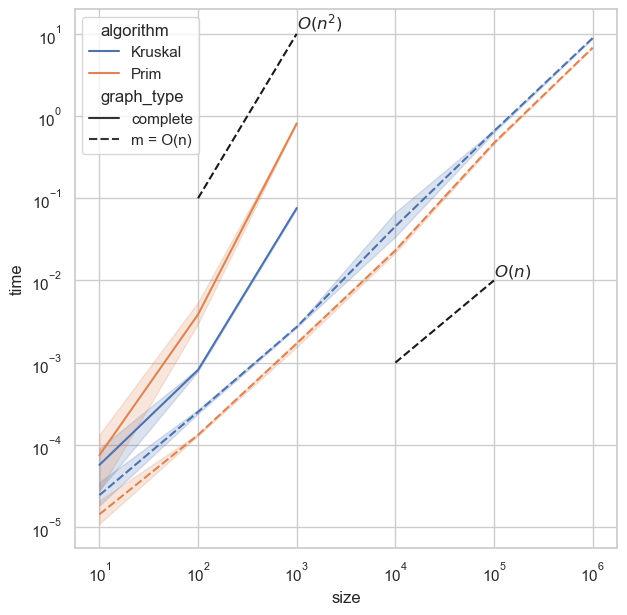

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

sns.lineplot(data, x="size", y="time", hue="algorithm", ax=ax, style="graph_type")

# add O(n) dashed line
ax.plot([10**4, 10**5], [1/1000, 1/100], color='k', ls="--", label="$O(n)$")
ax.text(10**5, 1/100, "$O(n)$", va="bottom", ha="left")

ax.plot([10**2, 10**3], [1/10, 10], color='k', ls="--", label="$O(n)$")
ax.text(10**3, 10, "$O(n^2)$", va="bottom", ha="left")


# log scale on axis
ax.set_yscale('log')
ax.set_xscale('log')

plt.savefig("tex/figs/complexity.pdf", bbox_inches='tight')

plt.show()